# 2. 데이터 탐색


이전 장에서 시계열 분석에 활용 가능한 딥러닝 모델 구조와 모델 평가지표에 대해 알아보았습니다. 본격적으로 시계열 데이터를 사용하여 분석을 해보기 앞서 2장에서는 분석에 사용될 데이터셋에 대한 탐색과 시각화를 해보겠습니다.

시계열 예측에 사용할 데이터는 코로나 확진자 데이터입니다. 데이터셋은 [COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19)와 [Kaggle: Novel Corona Virus 2019 Dataset
](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv)에서 확보했습니다. 

Johns Hopkins 대학의 저장소에는 매일 국가별 확진자 현황이 업데이트 되고 있으며, 이를 일자별 레포트 형태로 제공하고 있습니다. 일자별 레포트 양식을 변형해서 가공한 전체 기간의 레포트도 저장소에서 제공합니다. 또한 일자별 레포트 양식을 보존한 상태로 전체 데이터를 합한 데이터를 Kaggle에서 제공하고 있습니다. 

2.1절에서 해당 데이터를 다운받고 어떤 변수들로 이루어져 있는지 알아보겠습니다. 그리고 2.2절에서 전세계적으로 유행하고 있는 코로나인만큼 전세계 확진자로부터 추세를 알아보고 2.3절에서 대한민국 확진자를 더 자세하게 탐색해보도록 하겠습니다.

## 2.1 데이터 다운로드


먼저 코로나 확진자 데이터셋을 내려받도록 하겠습니다. 가짜연구소에서 제공하는 데이터 로더 함수를 사용하여 쉽게 받아볼 수 있습니다.

`git clone` 명령어를 사용하여 Tutorial-Book-Utils 저장소를 Colab 환경에 다운로드 합니다. \

In [23]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils

fatal: destination path 'Tutorial-Book-Utils' already exists and is not an empty directory.


![dataset example](https://github.com/Pseudo-Lab/Tutorial-Book/blob/master/book/pics/TS-ch2img01.PNG?raw=true)

- 그림 2-1 Tutorial-Book-Utils 저장소 폴더 경로

그림 2-1과 같이 저장소 내의 파일을 모두 다운받고 그 중에 `PL_data_loader.py` 파일이 위치한 것을 알 수 있습니다. 해당 파일에는 구글 드라이브의 데이터셋을 다운로드 하는 함수가 저장되어 있습니다. `--data` 파라미터에 `COVIDTimeSeries`을 입력하면 모델 구축에 활용할 코로나 확진자 수 데이터를 받을 수 있습니다.



In [24]:
!python Tutorial-Book-Utils/PL_data_loader.py --data COVIDTimeSeries

COVIDTimeSeries.zip is done!


In [25]:
import pandas as pd

all = pd.read_csv('covid_19_data.csv')
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')

`all`는 전세계의 일별 확진자, 사망자, 완치자에 대한 데이터입니다. `ObservationDate`는 발생 날짜, `Province/State`, `Country/Region`는 발생 지역과 국가, `Confirmed`는 확진자수, `Deaths`는 사망자수,	그리고 `Recovered`는 완치자수를 의미합니다. 해당 데이터프레임은 다음과 같습니다.

In [26]:
all

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
172475,172476,12/06/2020,Zaporizhia Oblast,Ukraine,2020-12-07 05:26:14,36539.0,337.0,6556.0
172476,172477,12/06/2020,Zeeland,Netherlands,2020-12-07 05:26:14,6710.0,104.0,0.0
172477,172478,12/06/2020,Zhejiang,Mainland China,2020-12-07 05:26:14,1295.0,1.0,1288.0
172478,172479,12/06/2020,Zhytomyr Oblast,Ukraine,2020-12-07 05:26:14,31967.0,531.0,22263.0


`confirmed`는 국가별 확진자 수에 대한 시퀀스(sequence) 데이터입니다. `Country/Region`, `Province/State`는 발생 지역과 국가, `Long`,	`Lat`는 경도와 위도, 그리고 `MM/DD/YYYY`는 일자별 확진자 수를 의미합니다. 해당 데이터프레임은 다음과 같습니다.

In [27]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,47851,48053,48116,48229,48527,48718,48952,49161,49378,49621
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,45188,46061,46863,47742,48530,49191,50000,50637,51424,52004
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,90014,90579,91121,91638,92102,92597,93065,93507,93933,94371
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,7162,7190,7236,7288,7338,7382,7382,7446,7466,7519
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,15804,15925,16061,16161,16188,16277,16362,16407,16484,16562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1381,1385,1391,1395,1397,1402,1405,1405,1407,1410
267,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,102992,104879,106622,108099,109738,111102,113409,115606,117755,119612
268,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2079,2081,2082,2083,2083,2084,2085,2085,2087,2087
269,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,18062,18091,18161,18217,18274,18322,18428,18456,18504,18575


## 2.2 전세계 데이터 EDA

`all`을 활용해 전세계 코로나 확진자 수를 시각화 해보도록 하겠습니다. 이 데이터프레임에는 위치를 나타내는 변수가 `Province/State`(지역)와 `Country/Region`(국가) 두 가지로 존재합니다. 그 중 국가별 확진자 수를 시각화 하기 위해서 `Country/Region` 기준으로 해당 국가의 모든 확진자 수를 더해줘야 합니다. 아래 코드를 통해 구현해보겠습니다. 





In [28]:
group = all.groupby(['ObservationDate', 'Country/Region'])['Confirmed'].sum()
group = group.reset_index()
group.head()

,ObservationDate,Country/Region,Confirmed
0,01/22/2020,Hong Kong,0.0
1,01/22/2020,Japan,2.0
2,01/22/2020,Macau,1.0
3,01/22/2020,Mainland China,547.0
4,01/22/2020,South Korea,1.0


## 2.3 대한민국 데이터 EDA



이번에는 `confirmed`에서 대한민국 데이터만 뽑아보겠습니다. 이 데이터는 누적데이터로 해당 날짜까지의 총 확진자수를 의미합니다.

In [29]:
confirmed[confirmed['Country/Region']=='Korea, South']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
157,NaN,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,...,40098,40786,41736,42766,43484,44364,45442,46453,47515,48570


여기서 지역명, 위경도를 제외한 확진자수에 대한 정보만 남기도록 하겠습니다. 그리고 이후 편의성을 위해 행과 열을 바꾸고(`.T`), 인덱스인 날짜를 str 형식에서 datetime 형식으로 바꿔주었습니다(`to_datetime`).

In [30]:
korea = confirmed[confirmed['Country/Region']=='Korea, South'].iloc[:,4:].T
korea.index = pd.to_datetime(korea.index)
korea

,157
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,3
...,...
2020-12-14,44364
2020-12-15,45442
2020-12-16,46453
2020-12-17,47515


가장 대표적인 시각화 패키지인 `matplotlib.pyplot`과 `seaborn`을 이용하여 시각화해보도록 하겠습니다. 이 때, `%matplotlib inline`은 해당 셀에서 바로 그래프를 보이게 할 수 있습니다. 그리고 `pylab`의 `rcParams['figure.figsize']`은 그래프 크기를 조정할 수 있으며, `sns.set`은 격자의 색깔과 글짜 크기를 조정할 수 있습니다.

In [31]:
!pip install seaborn

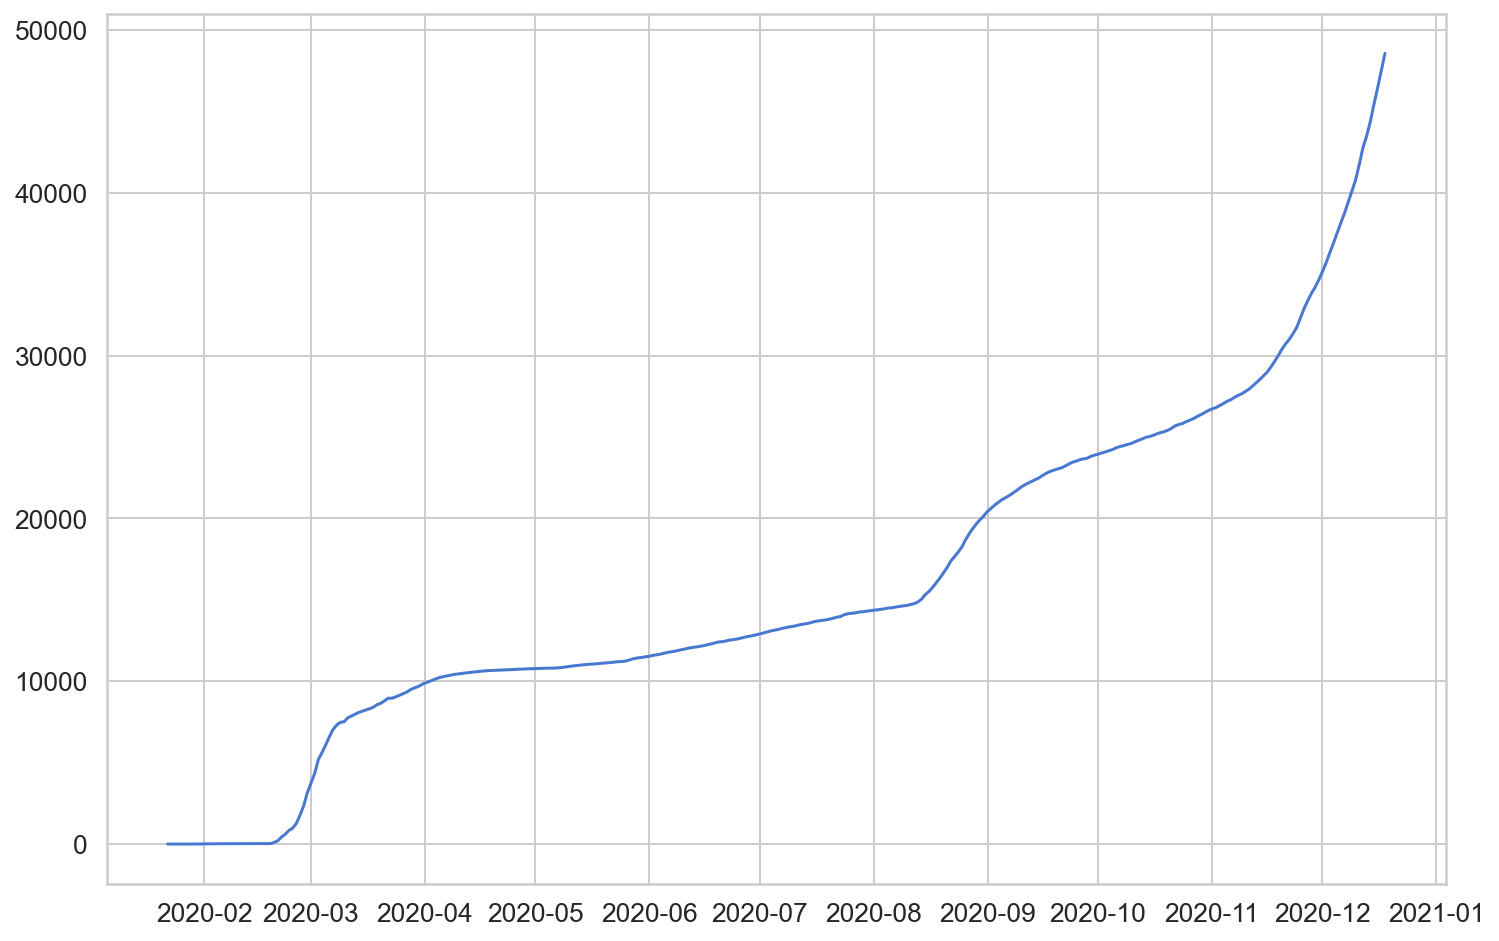

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

plt.plot(korea)
plt.show()

이번에는 누적데이터가 아닌 일일 단위로 확진자 수를 알아보겠습니다. `diff`를 이용하면 이전 행과 차이를 구할 수 있어 누적데이터를 쉽게 일별데이터로 바꿀 수 있습니다. 하지만 첫번째 행에는 결측치가 생겨 이를 누적데이터의 첫번째 값으로 채워주어야 합니다. 그리고 데이터 형식은 int(정수)로 바꿔줍니다.

In [33]:
daily_cases = korea.diff().fillna(korea.iloc[0]).astype('int')
daily_cases

,157
2020-01-22,1
2020-01-23,0
2020-01-24,1
2020-01-25,0
2020-01-26,1
...,...
2020-12-14,880
2020-12-15,1078
2020-12-16,1011
2020-12-17,1062


마찬가지로 일별 확진자수 데이터를 그래프로 나타내면 다음과 같습니다. 위에서 그래프 형식에 대한 셋팅을 미리 해두면 이후에는 똑같이 적용됩니다.

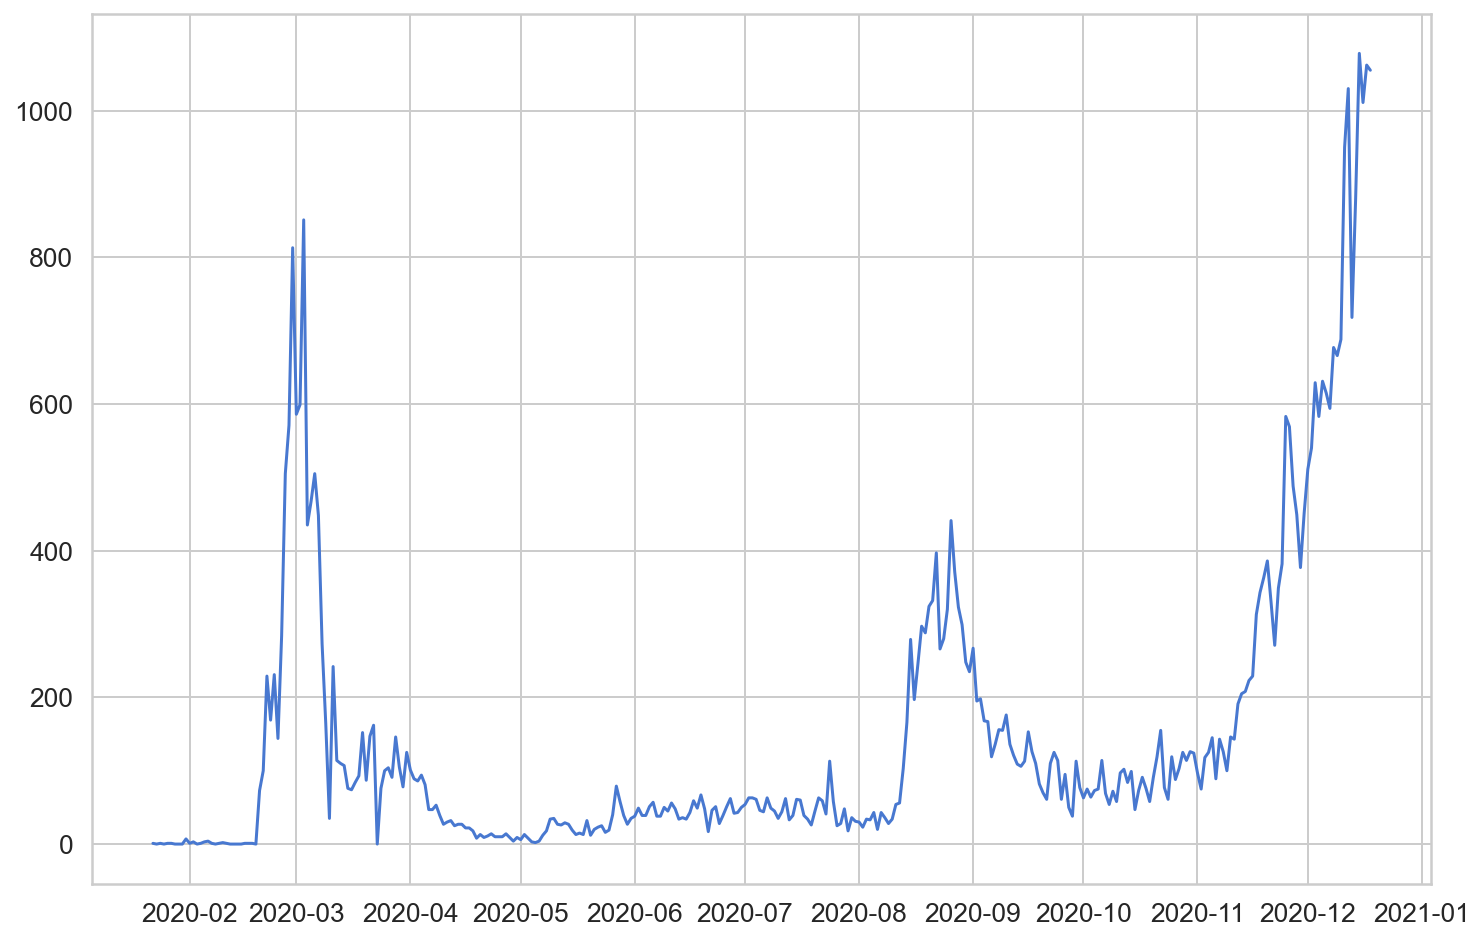

In [34]:
plt.plot(daily_cases)
plt.show()

3월초와 8월말에 급증하는 시기가 있고, 지속적으로 확진자가 발생하고 있는 것을 볼 수 있습니다. 그리고 연말이 되면서 다시 증가 추세를 보이고 있습니다.

이렇게 이번장에서 전세계와 대한민국의 코로나 확진자 수 데이터에 대해 알아보았습니다. 다음장부터는 대한민국 일별 코로나 확진자 수에 대해서 전처리하고 모델링하는 과정에 대해 알아보도록 하겠습니다.